# prophetという時系列解析ツールを触ってみた

In [1]:
import pandas as pd

df = pd.read_csv('./scrapinghub_townhousing.csv')
df.head()

,ds,name,shikikin,reikin
0,2017-10-20,61139,61139,61139
1,2017-10-21,61838,61838,61838
2,2017-10-23,44944,44944,44944
3,2017-10-25,60117,60117,60117
4,2017-10-26,61372,61372,61372


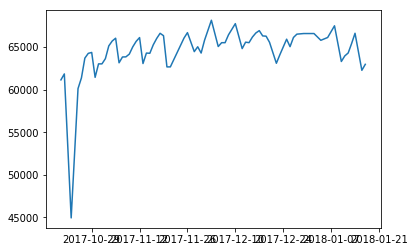

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [3]:
df = df.drop(2)
df.head()

,ds,name,shikikin,reikin
0,2017-10-20,61139,61139,61139
1,2017-10-21,61838,61838,61838
3,2017-10-25,60117,60117,60117
4,2017-10-26,61372,61372,61372
5,2017-10-27,63693,63693,63693


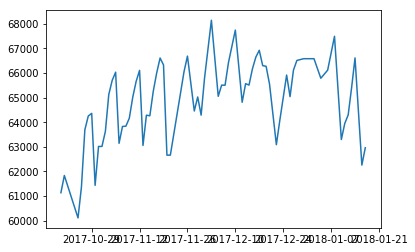

In [4]:
plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [5]:
d = {'ds': df['ds'], 'y': df['name']}
df = pd.DataFrame(data=d)
df.head()

,ds,y
0,2017-10-20,61139
1,2017-10-21,61838
3,2017-10-25,60117
4,2017-10-26,61372
5,2017-10-27,63693


In [6]:
from fbprophet import Prophet
# デイリーのデータなのでその旨を指定
m = Prophet(daily_seasonality=True, yearly_seasonality=True, interval_width=0.95)
m.fit(df)

In [7]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
72,2018-01-20
73,2018-01-21
74,2018-01-22
75,2018-01-23
76,2018-01-24


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-20,61127.479217,59543.713096,62739.357104
1,2017-10-21,61787.687072,60138.032080,63286.625636
2,2017-10-25,61103.623924,59470.254455,62780.126965
3,2017-10-26,61588.473789,59917.515250,63063.860842
4,2017-10-27,62488.751426,60832.264011,64115.743965


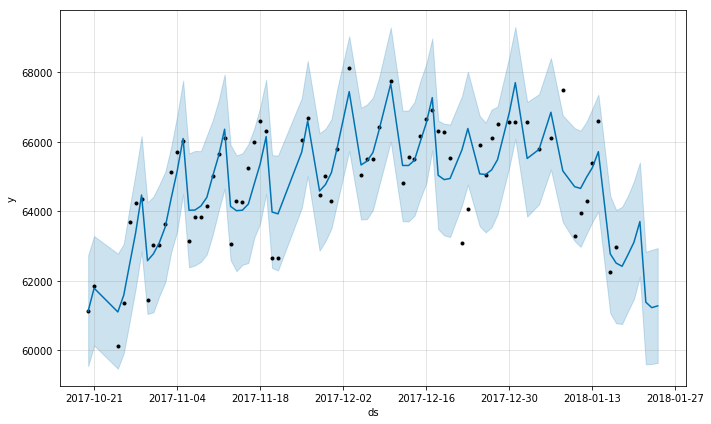

In [9]:
m.plot(forecast);

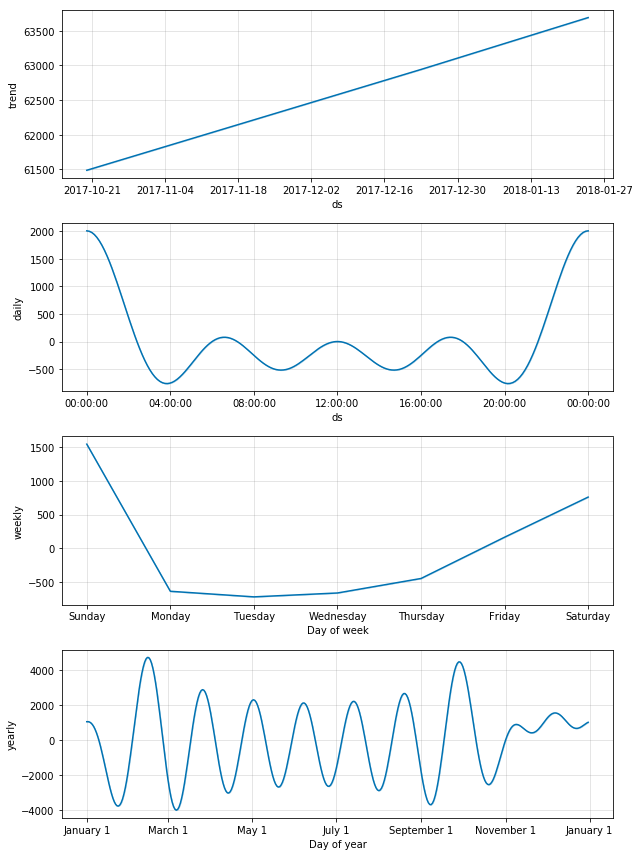

In [10]:
# dailyはフーリエ変換ででてくるパルス関数
m.plot_components(forecast);

In [11]:
# 予測から外れた日のスクレイピング結果を調べる
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2018-01-20,63110.278174,61477.429038,64866.428666
73,2018-01-21,63704.353479,62124.199031,65404.368691
74,2018-01-22,61384.483343,59599.353216,62832.396678
75,2018-01-23,61227.177086,59604.702258,62889.183657
76,2018-01-24,61278.252948,59639.293571,62941.579930


In [12]:
df = pd.read_csv('./scrapinghub_choei.csv')
df.head()

,ds,name,shikikin,reikin
0,2017-11-08,3042,3042,3042
1,2017-11-09,3274,3274,3274
2,2017-11-10,3267,3267,3267
3,2017-11-11,703,703,703
4,2017-11-12,3278,3278,3278


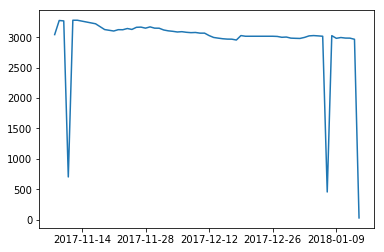

In [13]:
plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [14]:
df = df.drop(3)
df = df.drop(55)
df = df.drop(62)

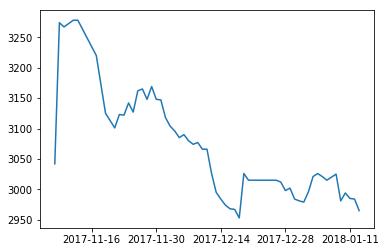

In [15]:
plt.plot(pd.to_datetime(df['ds']), df['name'])
plt.show()

In [16]:
d = {'ds': df['ds'], 'y': df['name']}
df = pd.DataFrame(data=d)
df.head()

,ds,y
0,2017-11-08,3042
1,2017-11-09,3274
2,2017-11-10,3267
4,2017-11-12,3278
5,2017-11-13,3278


In [17]:
# デイリーのデータなのでその旨を指定
m = Prophet(daily_seasonality=True, yearly_seasonality=True, interval_width=0.95)
m.fit(df)

In [18]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
62,2018-01-16
63,2018-01-17
64,2018-01-18
65,2018-01-19
66,2018-01-20


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-11-08,3135.821751,3091.248332,3188.333651
1,2017-11-09,3204.696316,3153.842134,3259.143954
2,2017-11-10,3238.632568,3186.390828,3292.601193
3,2017-11-12,3254.342439,3204.940369,3302.298372
4,2017-11-13,3264.069647,3212.210979,3313.150829


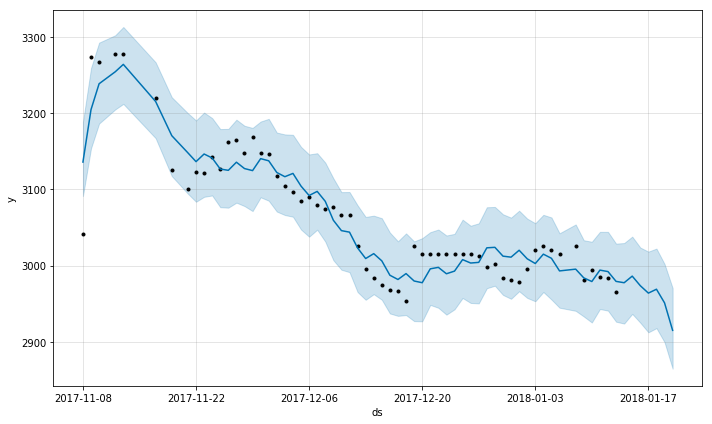

In [20]:
m.plot(forecast);

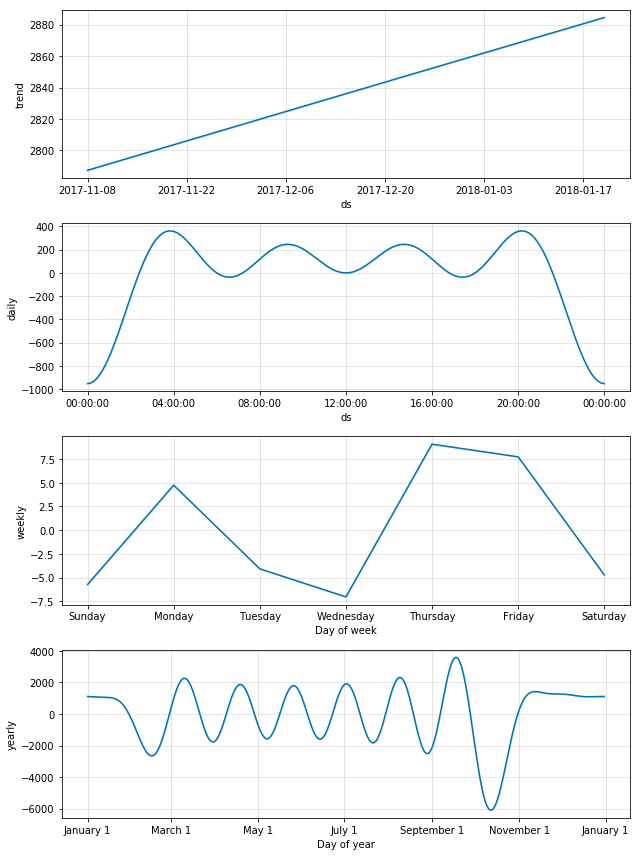

In [21]:
# dailyはフーリエ変換ででてくるパルス関数
m.plot_components(forecast);

In [22]:
## 結論

# - 欠損値の除去を頑張れば予測値から大きく外れてるものだけの通知が自動でできそう
# - スクレイピングの結果が0以外の異常な状態を検知できれば安心にクローラーをほったらかせそう